In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50 ## this is the size represented in the datasets

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\91814\\OneDrive\\Desktop\\python jupyter\\PlantVillage',
     shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 2 1 1 0 0 2 0 1 0]


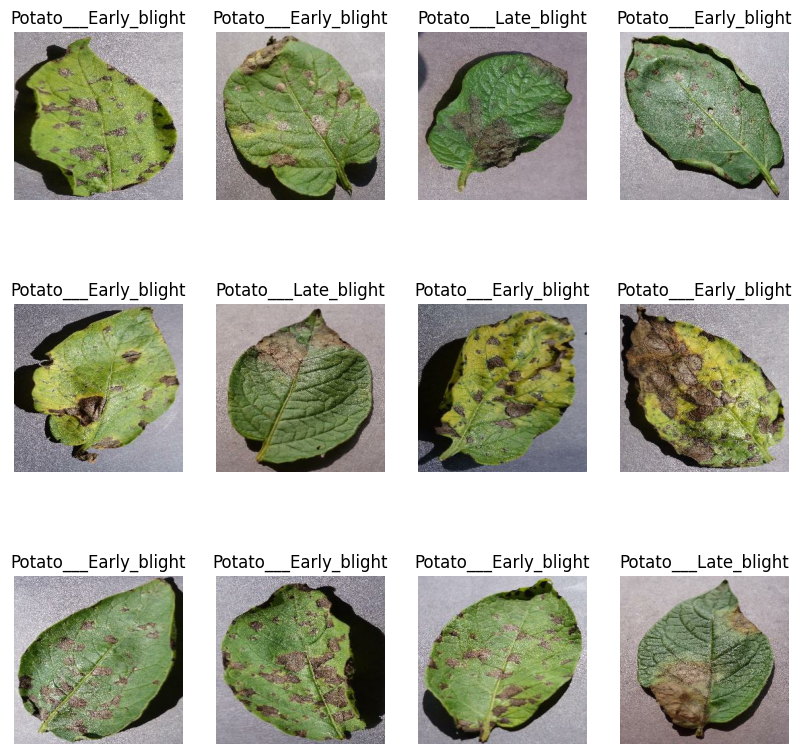

In [9]:
##plotting th image
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) ##plotting the imgae
        plt.title(class_names[label_batch[i]]) ##printing the label of the image
        plt.axis('off')

In [10]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
test_size = dataset.skip(54)
len(test_size)

14

In [14]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = dataset.take(6)
len(val_ds)

6

In [17]:
test_ds = test_size.skip(6)
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_size.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
#pip install --upgrade tensorflow


In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE ,IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [1]:
##

In [23]:
from keras.layers import BatchNormalization
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    #layer 1
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    #layer 2
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layer 3
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layer 4
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layer 5
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layer 6
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #flatten and feeding to dnn
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape= input_shape)

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 254, 254, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,875 (718.26 KB)

 Trainable params: 183,811 (718.01 KB)

 Non-trainable params: 64 (256.00 B)

In [109]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [110]:
history  = model.fit(train_ds , epochs=EPOCHS ,batch_size = BATCH_SIZE, validation_data=val_ds, verbose=1 )

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6685 - loss: 0.6938 - val_accuracy: 0.4427 - val_loss: 0.9607
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8523 - loss: 0.3702 - val_accuracy: 0.6354 - val_loss: 0.7744
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8850 - loss: 0.2998 - val_accuracy: 0.8750 - val_loss: 0.6093
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9185 - loss: 0.2007 - val_accuracy: 0.8906 - val_loss: 0.4804
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9349 - loss: 0.1542 - val_accuracy: 0.8646 - val_loss: 0.3518
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9372 - loss: 0.1333 - val_accuracy: 0.9010 - val_loss: 0.3431
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9617 - loss: 0.0997 - val_accuracy: 0.8906 - val_loss: 0.2630
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9725 - loss: 0.0671 - val_accuracy: 0.8958 - val_loss:

In [112]:
score = model.evaluate(test_ds)
score

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.9875 - loss: 0.0840


[0.06272482126951218, 0.9905660152435303]

In [123]:
history.history.keys() ## below history valuesn for all the parameters will be stored in the history object

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

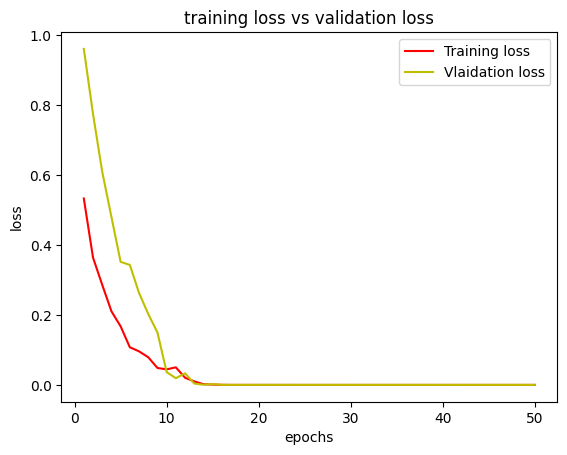

In [122]:
##plotting the graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.title('training loss vs validation loss')
plt.plot(epochs , loss , 'r',label='Training loss')
plt.plot(epochs , val_loss ,'y',label='Vlaidation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

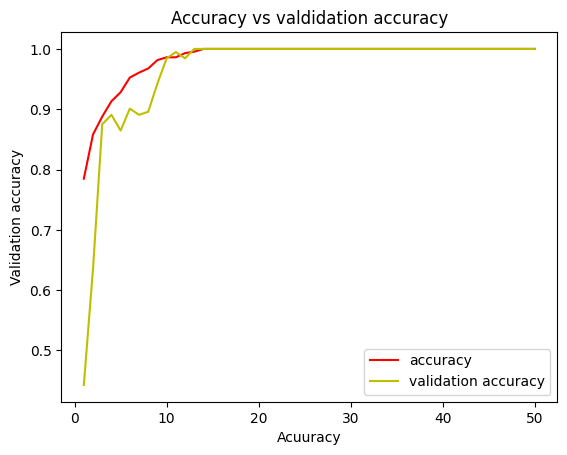

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(1,len(loss)+1)
plt.plot(epochs , acc, 'r',label='accuracy')
plt.plot(epochs , val_acc ,'y',label='validation accuracy')
plt.title('Accuracy vs valdidation accuracy')
plt.xlabel('Acuuracy')
plt.ylabel('Validation accuracy')
plt.legend()
plt.show()

first image to pridect : 
Actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label :  Potato___Early_blight
first image to pridect : 
Actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
Predicted label :  Potato___Late_blight
first image to pridect : 
Actual label :  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
Predicted label :  Potato___healthy
first image to pridect : 
Actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
Predicted label :  Potato___Early_blight
first image to pridect : 
Actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted label :  Potato___Early_blight
first image to pridect : 
Actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Predicted label :  Potato___Late_blight
first image to pridect : 
Actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Predicted label :  Potato___Late_blight
first image

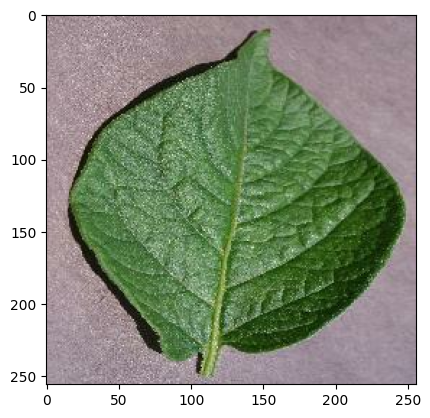

In [143]:
##predicting 
import numpy as np
for image_batch , label_batch in test_ds.take(BATCH_SIZE):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("first image to pridect : ")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted label : ",class_names[np.argmax(batch_prediction[0])])


In [145]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


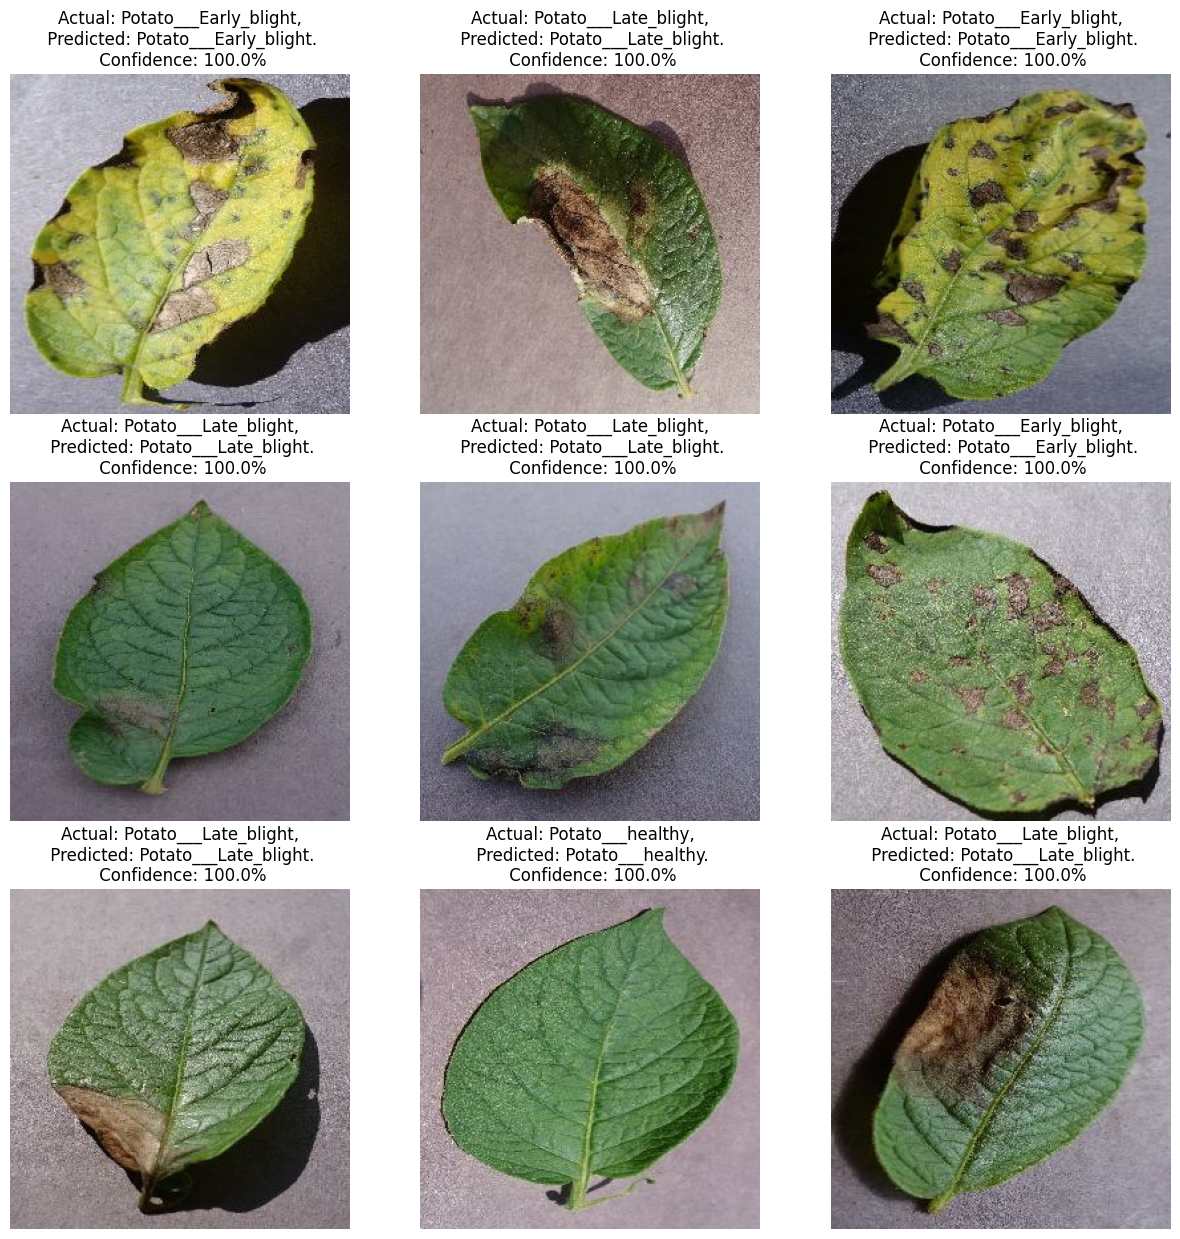

In [161]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) ##for plotting the next images
        plt.imshow(images[i].numpy().astype("uint8")) ##converting the tensor as the numpy array
        
        predicted_class, confidence = predict(model, images[i].numpy()) #passing the model and images to the predict function it will return the class label and the score of confidence
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")